## importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Load the Data

In [7]:
vac = pd.read_csv('C:/Users/aarti/OneDrive/Documents/COvid vaccine/country_vaccinations.csv')

### Read the Data

In [9]:
vac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22-02-2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,23-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,24-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,25-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,26-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


#### Finding the missing values if any

In [11]:
vac.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5285
people_vaccinated                      5951
people_fully_vaccinated                7895
daily_vaccinations_raw                 6539
daily_vaccinations                      224
total_vaccinations_per_hundred         5285
people_vaccinated_per_hundred          5951
people_fully_vaccinated_per_hundred    7895
daily_vaccinations_per_million          224
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [12]:
vac.isnull()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,False,False,False,False,False,True,True,True,False,False,True,True,False,False,False
1,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
2,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
3,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
4,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12966,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12967,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12968,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Here, we can see that data contains multiple null values which are not useful for data analysing , Hence will drop the data

In [21]:
vac_clean=vac[vac['people_fully_vaccinated_per_hundred'].notna()]
vac_cleaned=vac_clean[vac_clean['daily_vaccinations_raw'].notna()]

In [22]:
vac_cleaned.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [17]:
df_clean.isnull().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       6
people_vaccinated                        1
people_fully_vaccinated                  0
daily_vaccinations_raw                 566
daily_vaccinations                      20
total_vaccinations_per_hundred           6
people_vaccinated_per_hundred            1
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million          20
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

#### Displaying all the names of vaccines used

In [45]:
display(pd.DataFrame([vac['vaccines'].unique()],index = ['Vaccines']).T.sort_values('Vaccines'))

,Vaccines
24,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
25,"CanSino, Sinopharm/Beijing, Sputnik V"
20,"Covaxin, Oxford/AstraZeneca"
27,"EpiVacCorona, Sputnik V"
29,Johnson&Johnson
26,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
32,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
18,"Moderna, Oxford/AstraZeneca"
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
19,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


#### Grouping data by vaccines

In [64]:
vaccines = vac.groupby(['country','vaccines']).count().reset_index()[['country','vaccines']]\
.groupby('vaccines').count()['country'].reset_index().sort_values('country',ascending=False)
vaccines.columns= ['Vaccines','Number of countries used']
display(vaccines.style.set_caption('Number of countris used vaccine'))

,Vaccines,Number of countries used
11,Oxford/AstraZeneca,58
8,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",26
12,"Oxford/AstraZeneca, Pfizer/BioNTech",16
23,Pfizer/BioNTech,15
32,Sputnik V,9
28,Sinopharm/Beijing,9
10,"Moderna, Pfizer/BioNTech",6
25,"Pfizer/BioNTech, Sinovac",6
21,"Oxford/AstraZeneca, Sinovac",5
18,"Oxford/AstraZeneca, Sinopharm/Beijing",5


### Daily vaccinations by the type of vaccines

In [68]:
daily_total_vaccinations = vac.groupby(['date','vaccines'])['total_vaccinations'].sum().reset_index()

In [69]:
daily_total_vaccinations

,date,vaccines,total_vaccinations
0,01-01-2021,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",0.0
1,01-01-2021,"EpiVacCorona, Sputnik V",0.0
2,01-01-2021,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",0.0
3,01-01-2021,"Johnson&Johnson, Moderna, Pfizer/BioNTech",0.0
4,01-01-2021,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",489355.0
...,...,...,...
3080,31-12-2020,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",32013.0
3081,31-12-2020,Pfizer/BioNTech,0.0
3082,31-12-2020,"Pfizer/BioNTech, Sinovac",8649.0
3083,31-12-2020,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",4500000.0


###  Finding out which vaccine or combination of vaccines are being used the most in the world currently 

In [70]:
vaccine = vac_cleaned.groupby("country", as_index =False)["vaccines"].max()

In [71]:
vaccine

,country,vaccines
0,Albania,"Pfizer/BioNTech, Sinovac"
1,Andorra,"Oxford/AstraZeneca, Pfizer/BioNTech"
2,Argentina,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V"
3,Austria,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Azerbaijan,Sinovac
...,...,...
89,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech"
90,United States,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
91,Uruguay,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac"
92,Wales,"Oxford/AstraZeneca, Pfizer/BioNTech"


C:\Users\aarti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 70.0, 'Vaccine/Combination of Vaccines')

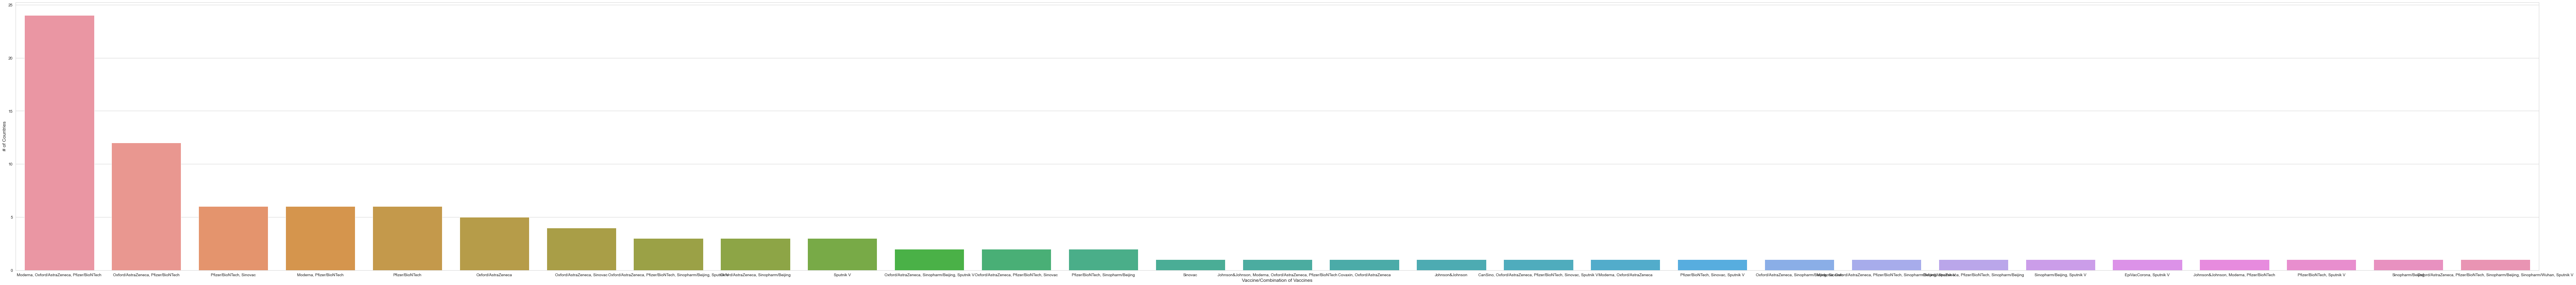

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize =(90,10))

sns.countplot("vaccines",data = vaccine, order = vaccine["vaccines"].value_counts().index)

plt.tight_layout()
plt.ylabel(" # of Countries", fontsize = 12)
plt.xlabel("Vaccine/Combination of Vaccines", fontsize =12)

### Sorting the information given according to the ISO code and countries

In [78]:
vac['iso_code'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CHL', 'CHN', 'COL',
       'COG', 'CRI', 'CIV', 'HRV', 'CUW', 'CYP', 'CZE', 'DNK', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'OWID_ENG', 'GNQ', 'EST', 'SWZ', 'ETH',
       'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GUY',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN',
       'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LIE', 'LTU',
       'LUX', 'MAC', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR',
       'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD',
       'OW

In [79]:
vac['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guernsey',
       'Guinea', 'Guyana', 'Honduras', 'H

In [84]:
vac2 = vac_cleaned.groupby(['country','iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'].max().reset_index()

<ipython-input-84-209c059ec3b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vac2 = vac_cleaned.groupby(['country','iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'].max().reset_index()


In [86]:
vac2.head(10)

,country,iso_code,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Albania,ALB,"Pfizer/BioNTech, Sinovac",3049.0,2438.0,611.0,254.0,0.11,0.08,0.02,88.0
1,Andorra,AND,"Oxford/AstraZeneca, Pfizer/BioNTech",15269.0,9781.0,4484.0,573.0,19.76,12.66,5.80,7416.0
2,Argentina,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",6433141.0,5620411.0,812730.0,169014.0,14.23,12.44,1.80,3740.0
3,Austria,AUT,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2557803.0,1818853.0,738950.0,53895.0,28.40,20.20,8.20,5984.0
4,Azerbaijan,AZE,Sinovac,1352210.0,899213.0,452997.0,54088.0,13.34,8.87,4.47,5335.0
5,Bahrain,BHR,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",1118519.0,627047.0,491472.0,20163.0,65.73,36.85,28.88,11850.0
6,Bangladesh,BGD,Oxford/AstraZeneca,6172159.0,5649563.0,522596.0,90381.0,3.75,3.43,0.32,549.0
7,Belgium,BEL,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",3059484.0,2341297.0,718187.0,75722.0,26.40,20.20,6.20,6534.0
8,Bolivia,BOL,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",557394.0,385889.0,171505.0,16720.0,4.78,3.31,1.47,1432.0
9,Brazil,BRA,"Oxford/AstraZeneca, Sinovac",33807132.0,24805515.0,9001617.0,1135847.0,15.90,11.67,4.23,5344.0
